In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets
from statistics import mean
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import sklearn.datasets as dta
import scipy.stats as st
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from catboost import Pool


/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

Import and clean-up the data

In [2]:
file_path=Path("Loan-Default.csv")
df_loans=pd.read_csv(file_path)
df_loans.drop('loan_id',axis=1,inplace=True)
df_loans.drop('proof_submitted',axis=1,inplace=True)
df_loans.head()


,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,30,2.0,642936,826092,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0


Machine Learning

Loop over the dataset

In [3]:
for x in df_loans.columns:
    print(x)
    print(df_loans[x].value_counts())
    print("----")

age
28    336
26    326
29    325
27    303
47    291
32    289
33    282
30    281
31    279
45    279
34    278
37    276
35    272
36    264
25    262
46    254
42    247
48    247
38    245
44    241
40    240
41    232
39    232
43    222
49    181
24    130
50     86
23     64
22     32
21      4
Name: age, dtype: int64
----
education
2.0    3796
1.0    2959
Name: education, dtype: int64
----
loan_amount
699108    63
639636    62
675108    62
663108    61
615636    61
          ..
381768     1
739392     1
676692     1
788244     1
638976     1
Name: loan_amount, Length: 2655, dtype: int64
----
asset_cost
840000     22
936000     20
900000     19
804000     17
852000     17
           ..
1657716     1
1216128     1
1176696     1
871356      1
786432      1
Name: asset_cost, Length: 5480, dtype: int64
----
no_of_loans
0      3615
2      1032
3       617
4       377
5       258
6       214
7       144
8       130
9        88
10       80
11       56
12       46
13       46
15       

In [4]:
df_loans.isna().sum()

age                   0
education           245
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

Drop null values in 'education' column

In [5]:
df_loans=df_loans.dropna(how="any")
df_loans.isna().sum()

age                 0
education           0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [6]:
df_loans.shape

(6755, 8)

Check the data type of each column

In [7]:
df_loans.dtypes

age                   int64
education           float64
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

Convert 'education' column values into numerical values

In [8]:
df_loans["education"]=df_loans["education"].astype(int)
df_loans.dtypes

age                 int64
education           int64
loan_amount         int64
asset_cost          int64
no_of_loans         int64
no_of_curr_loans    int64
last_delinq_none    int64
loan_default        int64
dtype: object

In [9]:
X=df_loans.copy()
X.drop("loan_default",axis=1,inplace=True)
X.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,1,504264,820920,2,2,0
1,48,1,728556,831444,6,2,0
2,30,2,642936,826092,0,0,0
3,28,1,746556,930924,0,0,0
4,29,1,1139880,1902000,0,0,0


In [10]:
for ni in X.columns:
    print(X[X[ni]=="7000, 6755"])

Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []
Empty DataFrame
Columns: [age, education, loan_amount, asset_cost, no_of_loans, no_of_curr_loans, last_delinq_none]
Index: []


/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but i

Get dummies

In [11]:
X=pd.get_dummies(X)
X.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,1,504264,820920,2,2,0
1,48,1,728556,831444,6,2,0
2,30,2,642936,826092,0,0,0
3,28,1,746556,930924,0,0,0
4,29,1,1139880,1902000,0,0,0


In [12]:
y=df_loans["loan_default"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]])

In [13]:
df_loans["loan_default"].value_counts()

0    4051
1    2704
Name: loan_default, dtype: int64

Check a sample of the dataset

In [14]:
df_loans.sample(5)

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
2803,44,2,782028,1090800,16,7,0,0
2563,31,2,580188,787944,3,3,0,1
2254,35,1,652956,802896,0,0,0,0
2111,24,2,544188,813024,3,3,0,0
6687,44,1,639540,847140,3,3,0,1


The value of R-squared is  0.9423076923076923


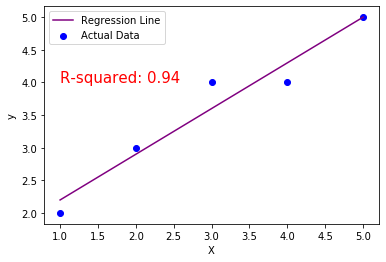

In [15]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) 
y = np.array([2, 3, 4, 4, 5])
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='purple', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.text(1, 4, f'R-squared: {r_squared:.2f}', fontsize=15, color='red')


print("The value of R-squared is ", r_squared)
plt.show()

Drop the target column

In [16]:
X=df_loans.drop('loan_default',axis=1)

In [17]:
y=df_loans['loan_default']

In [18]:
y

0       0
1       0
2       1
3       0
4       0
       ..
6995    1
6996    1
6997    1
6998    1
6999    0
Name: loan_default, Length: 6755, dtype: int64

In [19]:
df_loans.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1,504264,820920,2,2,0,0
1,48,1,728556,831444,6,2,0,0
2,30,2,642936,826092,0,0,0,1
3,28,1,746556,930924,0,0,0,0
4,29,1,1139880,1902000,0,0,0,0


Perform feature scaling over columns with large data compared to others, 'loan_amount' and 'asset_cost'

In [20]:
col=['loan_amount','asset_cost']

In [21]:
ss=StandardScaler()
X[col]=ss.fit_transform(X[col])
X

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,1,-1.057632,-0.436184,2,2,0
1,48,1,0.441706,-0.386891,6,2,0
2,30,2,-0.130643,-0.411959,0,0,0
3,28,1,0.562032,0.079064,0,0,0
4,29,1,3.191308,4.627494,0,0,0
...,...,...,...,...,...,...,...
6995,45,2,1.794648,1.612669,0,0,0
6996,41,2,0.124528,-0.576139,4,4,0
6997,47,2,-0.232920,-0.907310,35,11,0
6998,39,1,-0.051950,-0.562931,0,0,0


Split dataset into training and test set and perform cross validation

In [22]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.20,
    random_state=50)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} The accuracy is {accuracy_score(y_test,y_pred)}")
    score=cross_val_score(model,X,y,cv=5)
    print(f"{model} The avg cross value score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [23]:
model_df

{}

Logistic Regression Classifier

In [24]:
model=LogisticRegression()
model_val(model,X,y)

LogisticRegression() The accuracy is 0.5936343449296817


/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression() The avg cross value score is 0.5983715766099186


/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Perform Support Vector Classifier

In [25]:
model=svm.SVC()
model_val(model,X,y)

SVC() The accuracy is 0.5995558845299778
SVC() The avg cross value score is 0.5997039230199852


Perform Decision Tree Classifier

In [26]:
model=DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() The accuracy is 0.5122131754256106
DecisionTreeClassifier() The avg cross value score is 0.537379718726869


Perform Random Forest Classifier

In [27]:
model=RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() The accuracy is 0.5699481865284974
RandomForestClassifier() The avg cross value score is 0.5760177646188008


Perform Gradient Boosting Classifier

In [28]:
model=GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() The accuracy is 0.6025166543301258
GradientBoostingClassifier() The avg cross value score is 0.5934863064396744


Perform Hyperparameter Tuning to improve the performance of each of our classifiers

Hyperparameter Tuning for Logistic Regression

In [29]:
log_grid={"C":np.logspace(-4,4,20),
                     "solver":['liblinear']}

In [30]:
s_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_grid,
                   n_iter=20,
                   cv=5,
                   verbose=True)

In [31]:
s_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
s_log_reg.best_score_

0.6013323464100665

In [33]:
s_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

Hyperparameter Tuning for Support Vector Classifier

In [34]:
sv_grid={'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [35]:
s_svc=RandomizedSearchCV(svm.SVC(),
                   param_distributions=sv_grid,
                   cv=5,
                   n_iter=20,
                   verbose=True)

In [36]:
X = preprocessing.scale(X)
s_svc.fit(X,y)


/Users/mohamedsafadi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [37]:
s_svc.best_score_

0.5997039230199852

In [38]:
s_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

Hyperparameter Tuning for Random Forest Classifier

In [39]:
RandomForestClassifier()
randomf_grid={'n_estimators':np.arange(10,1000,10),
         'max_features':['auto','sqrt'],
         'max_depth':[None,3,5,10,20,30],
         'min_samples_split':[2,5,20,50,100],
         'min_samples_leaf':[1,2,5,10]
         }

In [40]:
rsrf=RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=randomf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

In [41]:
rsrf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [42]:
rsrf.best_score_

0.5997039230199851

In [43]:
rsrf.best_params_

{'n_estimators': 530,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 3}

Perform data analysis using Catboost library

Split the data into training and testing

In [44]:
X=df_loans.drop(columns=['loan_default'])
y=df_loans['loan_default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Train the Catboost Classifier

In [45]:
model=CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=6,
verbose=100)
model.fit(X_train,y_train)

0:	learn: 0.6864831	total: 68.5ms	remaining: 1m 8s
100:	learn: 0.6140739	total: 356ms	remaining: 3.17s
200:	learn: 0.5682387	total: 623ms	remaining: 2.47s
300:	learn: 0.5288960	total: 901ms	remaining: 2.09s
400:	learn: 0.4979286	total: 1.17s	remaining: 1.75s
500:	learn: 0.4710364	total: 1.54s	remaining: 1.54s
600:	learn: 0.4471021	total: 1.88s	remaining: 1.25s
700:	learn: 0.4256734	total: 2.16s	remaining: 921ms
800:	learn: 0.4042853	total: 2.45s	remaining: 609ms
900:	learn: 0.3872411	total: 2.74s	remaining: 301ms
999:	learn: 0.3709611	total: 3.02s	remaining: 0us


Fit the model

In [46]:
model.fit(X_train,y_train)

0:	learn: 0.6864831	total: 11.2ms	remaining: 11.1s


100:	learn: 0.6140739	total: 470ms	remaining: 4.18s
200:	learn: 0.5682387	total: 764ms	remaining: 3.04s
300:	learn: 0.5288960	total: 1.05s	remaining: 2.43s
400:	learn: 0.4979286	total: 1.34s	remaining: 2s
500:	learn: 0.4710364	total: 1.64s	remaining: 1.64s
600:	learn: 0.4471021	total: 1.92s	remaining: 1.28s
700:	learn: 0.4256734	total: 2.22s	remaining: 948ms
800:	learn: 0.4042853	total: 2.5s	remaining: 621ms
900:	learn: 0.3872411	total: 2.81s	remaining: 309ms
999:	learn: 0.3709611	total: 3.09s	remaining: 0us


Make predictions

In [47]:
y_pred=model.predict(X_test)

Generate and print the results for different accuracy scores

In [48]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

In [49]:
print(f"Accuracy:{accuracy}")
print(f"Accuracy:{precision}")
print(f"Accuracy:{recall}")
print(f"Accuracy:{f1}")
print(f"Accuracy:{roc_auc}")

Accuracy:0.5758697261287935
Accuracy:0.46770025839793283
Accuracy:0.3302919708029197
Accuracy:0.3871657754010695
Accuracy:0.560605303106053


            Feature  Importance
2       loan_amount    0.072190
3        asset_cost    0.066102
0               age    0.042688
4       no_of_loans    0.021765
5  no_of_curr_loans    0.013680
1         education    0.008729
6  last_delinq_none    0.000931


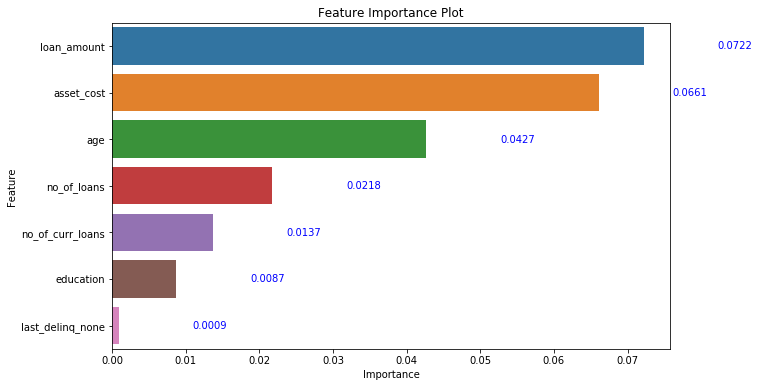

In [50]:
feature_imp = model.get_feature_importance(data=Pool(X_train, label=y_train), type='LossFunctionChange')
feature_imp_df= pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_imp})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
print(feature_imp_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
for i, v in enumerate(feature_imp_df['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='blue', va='center', fontsize=10)
plt.show()



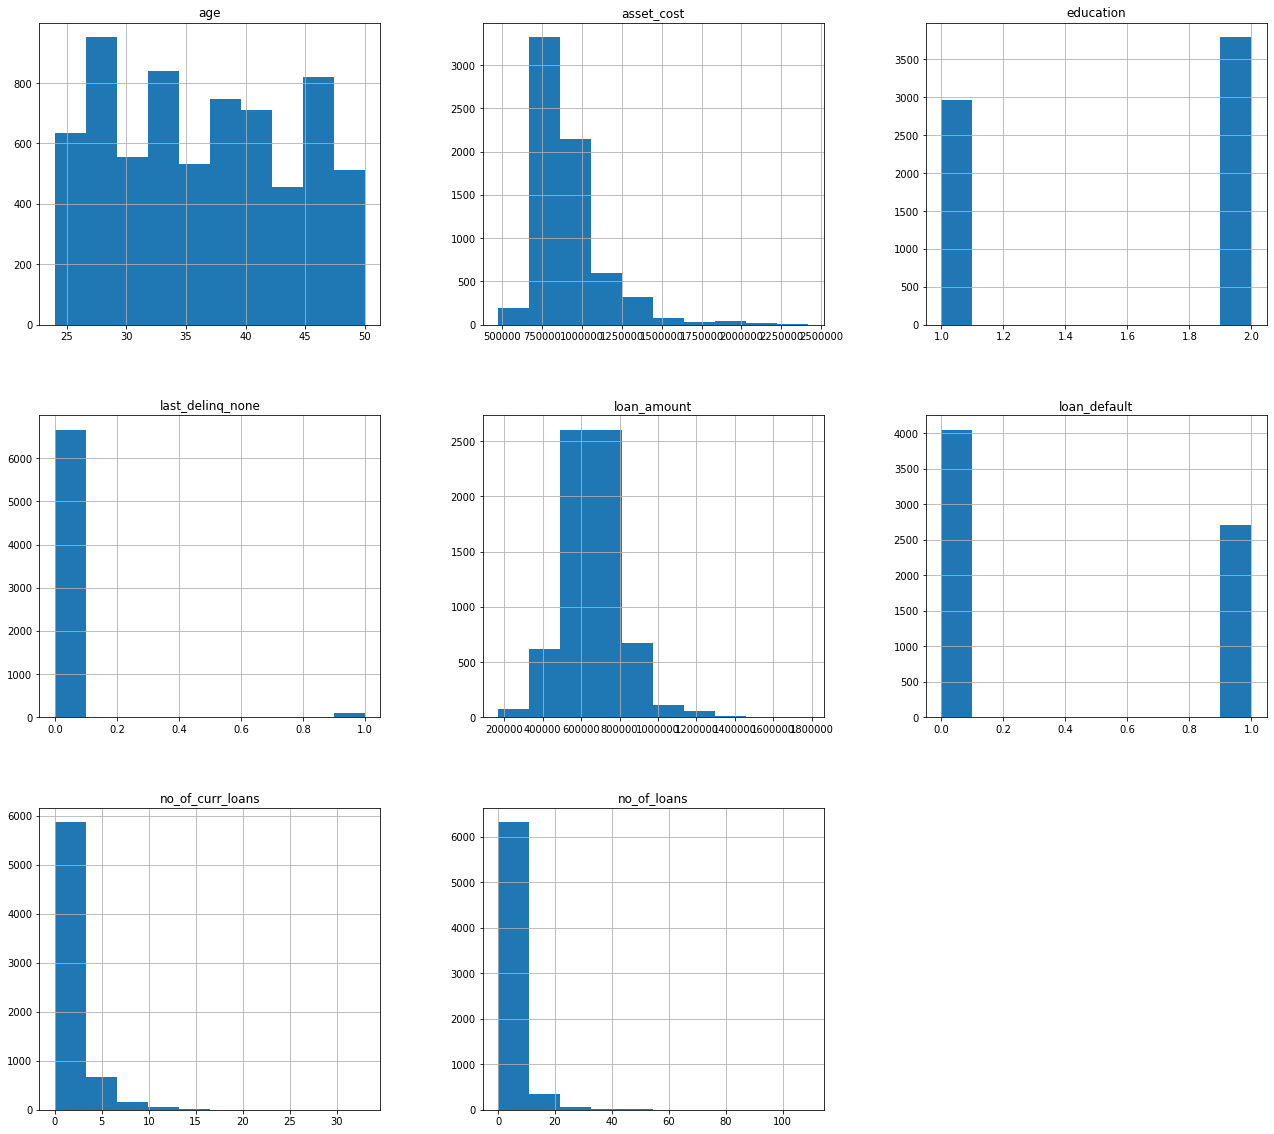

In [51]:
#Check the data distribution using 
df_loans.hist( figsize = (22, 20) )
plt.show()

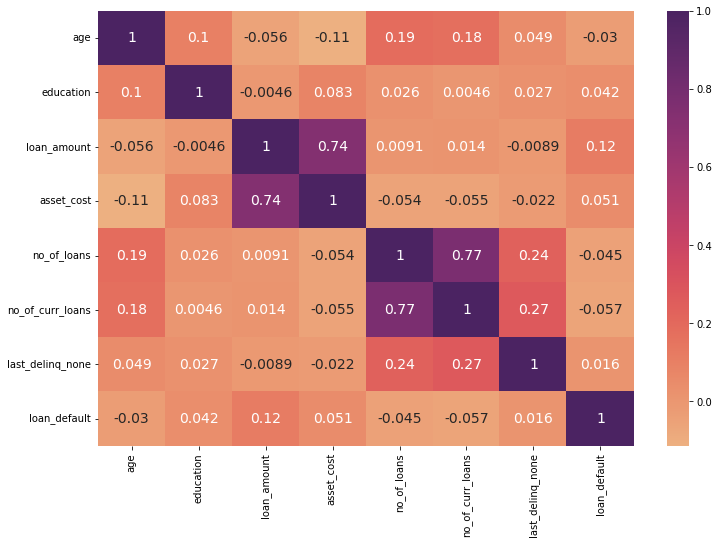

In [52]:
#Plot Correlation Plot
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df_loans.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [53]:
# Define a function to create the boxplots
def categorical_valcount_hist(feature):
    print(df_loans[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=df_loans)
    plt.show()

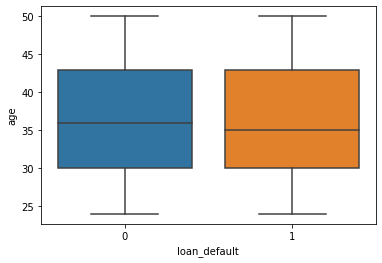

In [54]:
#Comparison of loan defaults to age
sns.boxplot(x ="loan_default" ,y ="age" ,data = df_loans)

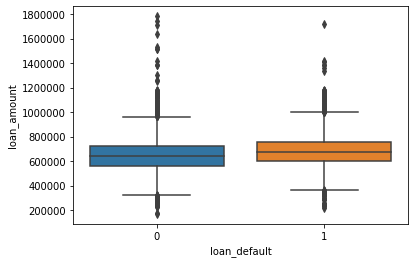

In [55]:
#Comparison of loan defaults to loan amounts
sns.boxplot(x ="loan_default" ,y ="loan_amount" ,data = df_loans)

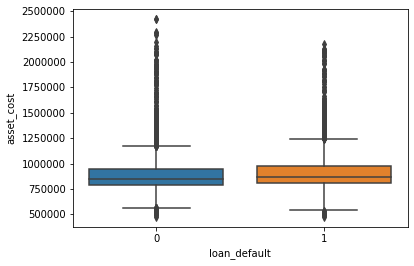

In [56]:
#Comparison of loan defaults to asset cost
sns.boxplot(x ="loan_default" ,y ="asset_cost" ,data = df_loans)

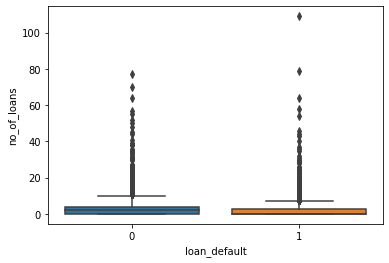

In [57]:
#Comparison of loan defaults to # of loans
sns.boxplot(x ="loan_default" ,y ="no_of_loans" ,data = df_loans)